In [4]:
import geopandas as gpd
import warnings
warnings.filterwarnings("ignore")

# lakes_gdf = gpd.read_file('Data/NH_Wildlife_Action_Plan_2020_-_Aquatic_Habitat_(Lakes_Ponds).geojson')
wetlands_gdf = gpd.read_file('Data/NH_Wetlands_Geopackage.gpkg', layer='NH_Wetlands')
blooms_gdf = gpd.read_file("Data/aggregated_bloom_data_buffer_1km.gpkg")

In [5]:
blooms_gdf.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
#blooms_gdf = blooms_gdf.to_crs("EPSG:3857")
wetlands_gdf = wetlands_gdf.to_crs("EPSG:3857")

In [7]:
wetlands_gdf.head()

,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,L1UBH,Lake,51.356344,202409CSw{D91EC9A6-D26F-481B-AB64-124F1AA091A0...,"MULTIPOLYGON (((-7972298.749 5623063.785, -797..."
1,PEM1/SS1C,Freshwater Emergent Wetland,2.172405,202409CSw{BA6CBAD3-3995-42C5-BD75-13EF28888966...,"MULTIPOLYGON (((-7970783.735 5623008.171, -797..."
2,PEM1/SS1E,Freshwater Emergent Wetland,6.293036,202409CSw{4B841E15-3327-4FDF-A8BB-22AD968EBFF4...,"MULTIPOLYGON (((-7961892.627 5612642.816, -796..."
3,PEM1A,Freshwater Emergent Wetland,1.336244,202409CSw{B24C3487-861A-4E6E-ACEA-7219C211A6CB...,"MULTIPOLYGON (((-7959563.697 5606617.885, -795..."
4,PEM1A,Freshwater Emergent Wetland,0.633088,202409CSw{5358BB0E-F6B1-428A-A98A-0E0064D6C780...,"MULTIPOLYGON (((-7961711.944 5614494.074, -796..."


In [8]:
blooms_gdf.head()

,date_advisory_issued,lake,town,dominant_taxa,total_cell_concentration,advisory_days,notification_type,year,YearMonth,Shape_Length,Shape_Area,permanent_identifier,gnis_id,areasqkm,elevation,ATTRIBUTE,WETLAND_TYPE,ACRES,NWI_ID,geometry
0,2019-10-11,Adder Pond/Hopkins Pond,Andover,Anabaena/Dolichospermum,"3,580,000",41.0,Warning,2019,2019-10,0.015388,0.000012,135993959,00865203,0.109221,196.3,"L1ABH,L1UBH",Lake,28.395538,202409CSw{1ADFAE7F-219D-4F46-B4A0-77028F0E126F...,"POLYGON ((-7994994.165 5380215.739, -7994994.1..."
1,2022-10-06,Adder Pond/Hopkins Pond,Andover,Chrysosporum,"3,100,000",43.0,Warning,2022,2022-10,0.015388,0.000012,135993959,00865203,0.109221,196.3,"L1ABH,L1UBH",Lake,28.395538,202409CSw{1ADFAE7F-219D-4F46-B4A0-77028F0E126F...,"POLYGON ((-7994994.165 5380215.739, -7994994.1..."
2,2010-05-25,Angle Pond,Sandown,Anabaena,"235,000",9.0,Warning,2010,2010-05,0.049024,0.000072,135909961,00865245,0.650459,67.1,"L1UBH,L1ABH",Lake,161.385552,202409CSw{37230243-4B9F-4054-B052-039EC1BA33BB...,"POLYGON ((-7923107.436 5297419.249, -7923104.0..."
3,2021-08-25,Angle Pond,Sandown,None,None,NaN,Alert,2021,2021-08,0.049024,0.000072,135909961,00865245,0.650459,67.1,"L1UBH,L1ABH",Lake,161.385552,202409CSw{37230243-4B9F-4054-B052-039EC1BA33BB...,"POLYGON ((-7923107.436 5297419.249, -7923104.0..."
4,2022-09-12,Angle Pond,Sandown,Dolichospermum,"138,200",7.0,Warning,2022,2022-09,0.049024,0.000072,135909961,00865245,0.650459,67.1,"L1UBH,L1ABH",Lake,161.385552,202409CSw{37230243-4B9F-4054-B052-039EC1BA33BB...,"POLYGON ((-7923107.436 5297419.249, -7923104.0..."


In [9]:
blooms = blooms_gdf.copy()
wetlands = wetlands_gdf[wetlands_gdf['WETLAND_TYPE'].isin(["Estuarine and Marine Wetland",
                                                          "Freshwater Emergent Wetland",
                                                          "Freshwater Forested/Shrub Wetland"])]

In [10]:
wetlands_within_buffers = gpd.sjoin(wetlands, blooms, how='inner', predicate='intersects')

In [22]:
wetlands_within_buffers

,ATTRIBUTE_left,WETLAND_TYPE_left,ACRES_left,NWI_ID_left,geometry,index_right,date_advisory_issued,lake,town,dominant_taxa,...,Shape_Area,permanent_identifier,gnis_id,areasqkm,elevation,ATTRIBUTE_right,WETLAND_TYPE_right,ACRES_right,NWI_ID_right,area
1318,PEM1Eh,Freshwater Emergent Wetland,0.259662,202409CSw{D9121EDE-B96F-4BB4-8407-4842F89A030C...,"MULTIPOLYGON (((-7907151.056 5575260.450, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...,2080.397208
1319,PEM1Eh,Freshwater Emergent Wetland,0.231497,202409CSw{205A593E-F3B9-411A-ACBD-3D6F223EA321...,"MULTIPOLYGON (((-7907109.730 5575245.934, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...,1854.748948
1320,PEM1Eh,Freshwater Emergent Wetland,1.010572,202409CSw{1A193DE4-6704-4F3B-A972-CBFAF6450E9F...,"MULTIPOLYGON (((-7906876.217 5575366.228, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...,8096.779153
1321,PEM1Eh,Freshwater Emergent Wetland,0.637620,202409CSw{B73D9708-ADCF-4AB5-865A-63ED368BCF36...,"MULTIPOLYGON (((-7906565.823 5575357.135, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...,5108.733908
1325,PEM1Eh,Freshwater Emergent Wetland,0.234092,202409CSw{19647A45-D601-4523-AC97-214B6CCC1DC6...,"MULTIPOLYGON (((-7907382.003 5579730.711, -790...",587,2023-06-13,Umbagog Lake,Errol,Photo,...,0.002156,118181950,00870563,18.971610,NaN,"L2ABH,L1UBHh,L1ABHh,L1UBH,L2UBHh,L2USCh,L2UBH",Lake,7419.571276,202409CSw{27B70BBA-5262-4423-95A9-3064D3E57325...,1877.372560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",536,2020-10-07,Spofford Lake,Chesterfield,None,...,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...,8859.387051
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",535,2020-09-10,Spofford Lake,Chesterfield,"Scytonema, Stigonema, Tolypothrix, Lyngbya",...,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...,8859.387051
258644,PFO4E,Freshwater Forested/Shrub Wetland,1.174040,202409CSw{7500796C-6881-4EB4-A0DC-1CBCB0033F58...,"MULTIPOLYGON (((-8063658.111 5297363.180, -806...",539,2022-07-20,Spofford Lake,Chesterfield,Benthic,...,0.000327,111888875,00870094,2.962678,218.0,"L2UBH,L1UBH",Lake,733.390390,202409CSw{0AA635C6-4B06-437A-91D8-F7DF3892D604...,8859.387051
258650,PFO1/4E,Freshwater Forested/Shrub Wetland,6.119654,202409CSw{3DB5677F-DB89-4312-93AD-8F1410D50F12...,"MULTIPOLYGON (((-8050416.030 5302220.728, -805...",626,2021-10-07,Wilson Pond,Salem,None,...,0.000032,136897612,00870929,0.293135,145.0,"L1UBHh,PUBHh","Lake,Freshwater Pond",83.805818,202409CSw{68EDEF4B-CF1B-4D02-9268-03741B185FD8...,46229.440169


In [24]:
# Group by lake and date_advisory_issued (or any other columns) and sum the 'ACRES' values
wetland_area_by_lake = wetlands_within_buffers.groupby(['NWI_ID_right', 'WETLAND_TYPE_left'], as_index=False).agg({
    'lake': 'first', 'town': 'first', 'date_advisory_issued': 'first', 'advisory_days': 'first','dominant_taxa': 'first', 'total_cell_concentration': 'first',
    'year': 'first', 'YearMonth': 'first', 'Shape_Area': 'first', 'areasqkm': 'first', 'elevation': 'first', 'ATTRIBUTE_right': 'first', 'ACRES_right': 'first',
    'ACRES_left': 'sum', 'area': 'sum', 'geometry': 'first'  # Replace 'other_columns' with actual columns you want to aggregate or keep
})

# Check the result
wetland_area_by_lake


,NWI_ID_right,WETLAND_TYPE_left,lake,town,date_advisory_issued,advisory_days,dominant_taxa,total_cell_concentration,year,YearMonth,Shape_Area,areasqkm,elevation,ATTRIBUTE_right,ACRES_right,ACRES_left,area,geometry
0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Emergent Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,2020-09,0.000012,0.107119,NaN,"L1UBH,L2UBH",27.695900,18.351231,1.386115e+05,"MULTIPOLYGON (((-8031776.930 5301771.157, -803..."
1,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Forested/Shrub Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,2020-09,0.000012,0.107119,NaN,"L1UBH,L2UBH",27.695900,57.436498,4.338059e+05,"MULTIPOLYGON (((-8030842.278 5302126.676, -803..."
2,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Emergent Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,2022-09,0.000087,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,58.825881,4.470139e+05,"MULTIPOLYGON (((-8045768.184 5330632.122, -804..."
3,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Forested/Shrub Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,2022-09,0.000087,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,330.169475,2.508606e+06,"MULTIPOLYGON (((-8047108.094 5327743.779, -804..."
4,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Freshwater Emergent Wetland,Rock Pond,Windham,2010-06-15,7.0,Anabaena,"196,000",2010,2010-06,0.000003,0.028516,46.6,"L1ABHh,L1UBHh,PUBH",42.136143,41.927905,3.160977e+05,"MULTIPOLYGON (((-7930908.294 5580284.164, -793..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Freshwater Forested/Shrub Wetland,Lower Suncook Lake,Barnstead,2021-10-07,NaN,None,None,2021,2021-10,0.000133,1.194137,167.9,L1UBHh,700.496634,110.611335,8.473538e+05,"MULTIPOLYGON (((-7932460.120 5366796.191, -793..."
262,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Emergent Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,2014-09,0.000083,0.754316,97.8,L1UBHh,206.088813,14.154131,1.072807e+05,"MULTIPOLYGON (((-7946766.707 5319345.276, -794..."
263,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Forested/Shrub Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,2014-09,0.000083,0.754316,97.8,L1UBHh,206.088813,25.366359,1.922471e+05,"MULTIPOLYGON (((-7944691.949 5315813.938, -794..."
264,202409CSw{FF4B7566-34B9-4717-AFD0-8917883C9B0B...,Freshwater Emergent Wetland,Norway Pond,Hancock,2022-10-25,5.0,Photo,">70,000",2022,2022-10,0.000018,0.160173,253.0,"L1UBH,L1AB/UBH",40.344556,132.728675,1.003936e+06,"MULTIPOLYGON (((-8013249.256 5306918.251, -801..."


,NWI_ID_right,WETLAND_TYPE_left,lake,town,date_advisory_issued,advisory_days,dominant_taxa,total_cell_concentration,year,YearMonth,Shape_Area,areasqkm,elevation,ATTRIBUTE_right,ACRES_right,ACRES_left,area,geometry
0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Emergent Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,2020-09,0.000012,0.107119,NaN,"L1UBH,L2UBH",27.695900,18.351231,1.386115e+05,"MULTIPOLYGON (((-8031776.930 5301771.157, -803..."
1,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Forested/Shrub Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,2020-09,0.000012,0.107119,NaN,"L1UBH,L2UBH",27.695900,57.436498,4.338059e+05,"MULTIPOLYGON (((-8030842.278 5302126.676, -803..."
2,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Emergent Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,2022-09,0.000087,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,58.825881,4.470139e+05,"MULTIPOLYGON (((-8045768.184 5330632.122, -804..."
3,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Forested/Shrub Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,2022-09,0.000087,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,330.169475,2.508606e+06,"MULTIPOLYGON (((-8047108.094 5327743.779, -804..."
4,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Freshwater Emergent Wetland,Rock Pond,Windham,2010-06-15,7.0,Anabaena,"196,000",2010,2010-06,0.000003,0.028516,46.6,"L1ABHh,L1UBHh,PUBH",42.136143,41.927905,3.160977e+05,"MULTIPOLYGON (((-7930908.294 5580284.164, -793..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Freshwater Forested/Shrub Wetland,Lower Suncook Lake,Barnstead,2021-10-07,NaN,None,None,2021,2021-10,0.000133,1.194137,167.9,L1UBHh,700.496634,110.611335,8.473538e+05,"MULTIPOLYGON (((-7932460.120 5366796.191, -793..."
262,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Emergent Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,2014-09,0.000083,0.754316,97.8,L1UBHh,206.088813,14.154131,1.072807e+05,"MULTIPOLYGON (((-7946766.707 5319345.276, -794..."
263,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Forested/Shrub Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,2014-09,0.000083,0.754316,97.8,L1UBHh,206.088813,25.366359,1.922471e+05,"MULTIPOLYGON (((-7944691.949 5315813.938, -794..."
264,202409CSw{FF4B7566-34B9-4717-AFD0-8917883C9B0B...,Freshwater Emergent Wetland,Norway Pond,Hancock,2022-10-25,5.0,Photo,">70,000",2022,2022-10,0.000018,0.160173,253.0,"L1UBH,L1AB/UBH",40.344556,132.728675,1.003936e+06,"MULTIPOLYGON (((-8013249.256 5306918.251, -801..."


264


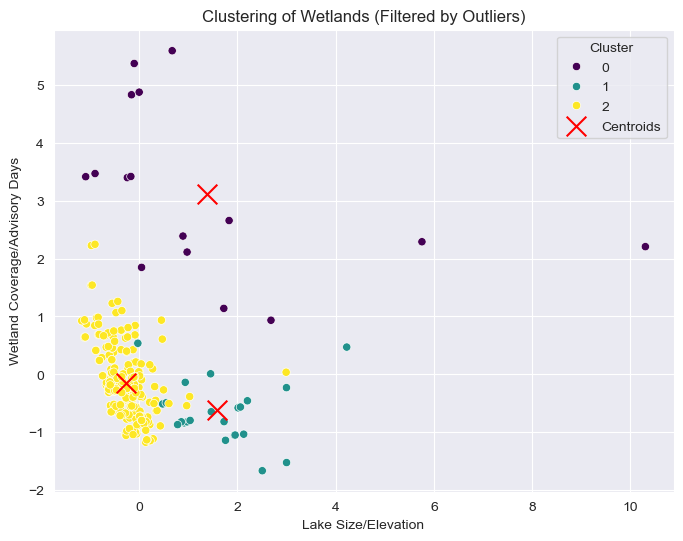

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns

# Step 1: Select the relevant numerical columns for clustering
filtered_data = wetland_area_by_lake[wetland_area_by_lake['lake'] != 'Winnipesaukee, Lake'].copy().reset_index()
filtered_data.drop(columns='cluster')
print(len(filtered_data))
features = ['ACRES_right', 'ACRES_left', 'elevation', 'advisory_days']

# Subset the dataframe to only include the relevant features
# z_scores = zscore(wetland_area_by_lake[features])
# filtered_data = wetland_area_by_lake[(abs(z_scores) <3).all(axis=1)]
X = filtered_data[features]

# Step 2: Standardize the features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Perform K-Means Clustering
# Choosing 3 clusters as an example, you can experiment with different numbers
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_data['cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PCA_1', 'PCA_2'])

filtered_data = pd.concat([filtered_data, pca_df], axis=1)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=filtered_data['PCA_1'], y=filtered_data['PCA_2'], hue=filtered_data['cluster'], palette='viridis')
centroids = pca.transform(kmeans.cluster_centers_)  # Assuming 'kmeans' is your KMeans model
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')
plt.xlabel('Lake Size/Elevation')
plt.ylabel('Wetland Coverage/Advisory Days')
plt.title('Clustering of Wetlands (Filtered by Outliers)')
plt.legend(title='Cluster')
plt.show()

In [113]:
import pandas as pd

# Assuming `pca` is your PCA instance
pca_components = pd.DataFrame(
    pca.components_, 
    columns=filtered_data[features].columns, 
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Display the components to see which features contribute most to each principal component
print(pca_components)


     ACRES_right  ACRES_left  elevation  advisory_days
PC1     0.069752    0.765108  -0.233048       0.596183
PC2     0.820676    0.218271   0.495551      -0.182423


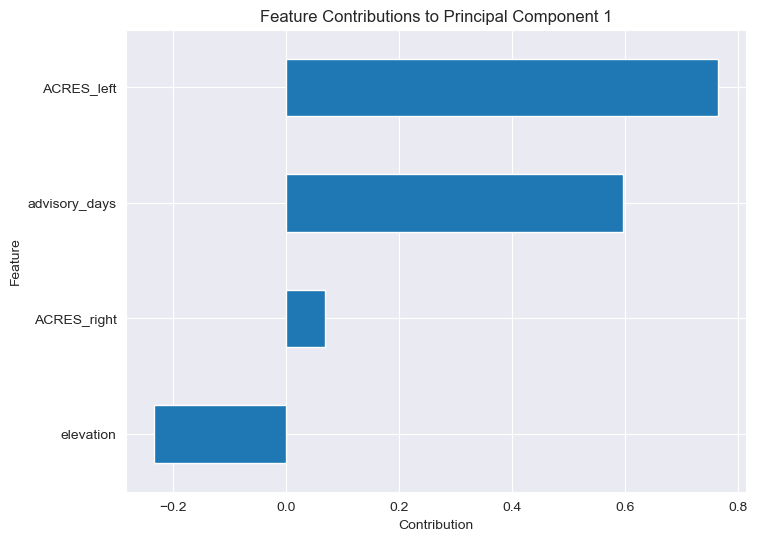

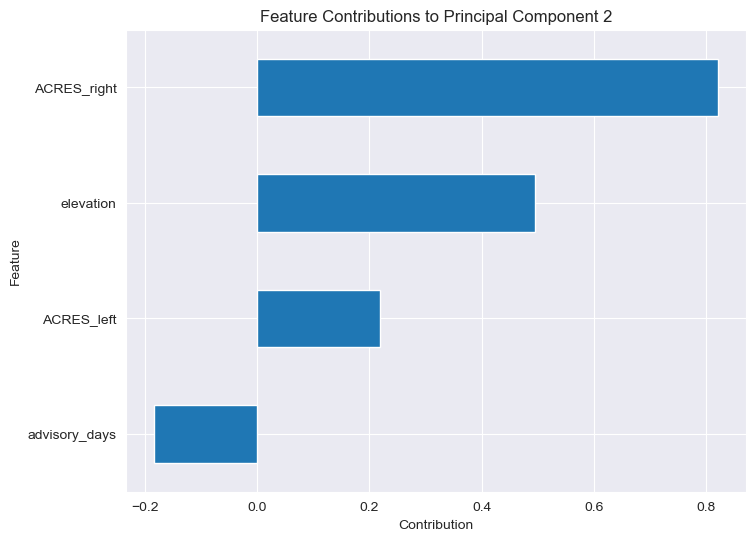

In [114]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert PCA components to a DataFrame for easy analysis
pca_components = pd.DataFrame(
    pca.components_, 
    columns=filtered_data[features].columns,  # Ensure this matches your features
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

# Plot feature contributions for the first two components
for i in range(2):  # Adjust range if you want to plot more components
    plt.figure(figsize=(8, 6))
    component = pca_components.iloc[i]  # Get the i-th principal component
    component.sort_values().plot(kind='barh')  # Sort for better visualization
    plt.title(f'Feature Contributions to Principal Component {i+1}')
    plt.xlabel('Contribution')
    plt.ylabel('Feature')
    plt.show()


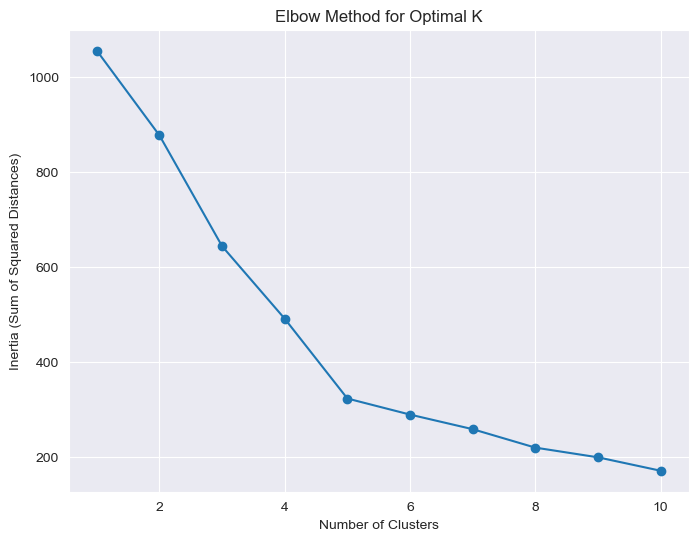

In [106]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Calculate the sum of squared distances (inertia) for a range of cluster numbers
inertia = []
for k in range(1, 11):  # Check for number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 2: Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.show()


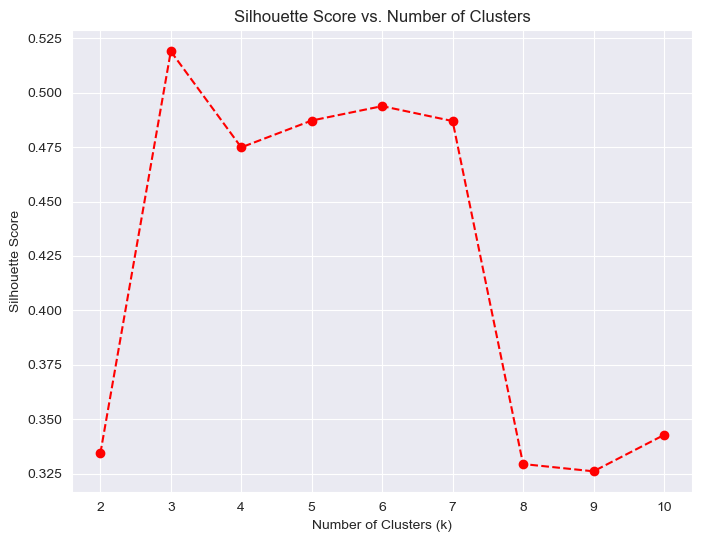

The optimal number of clusters is: 3


In [178]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store the number of clusters and corresponding silhouette scores
cluster_range = range(2, 11)  # Range of clusters to evaluate (2 to 10 in this case)
silhouette_scores = []

# Loop over the range of cluster numbers
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(score)

# Plot the silhouette scores for each cluster number
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Find the optimal number of clusters (max silhouette score)
optimal_k = cluster_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is: {optimal_k}")


In [115]:
filtered_data

,index,NWI_ID_right,WETLAND_TYPE_left,lake,town,date_advisory_issued,advisory_days,dominant_taxa,total_cell_concentration,year,...,areasqkm,elevation,ATTRIBUTE_right,ACRES_right,ACRES_left,area,geometry,cluster,PCA_1,PCA_2
0,0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Emergent Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,...,0.107119,NaN,"L1UBH,L2UBH",27.695900,18.351231,1.386115e+05,"MULTIPOLYGON (((-8031776.930 5301771.157, -803...",2,-0.265832,-0.427644
1,1,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Freshwater Forested/Shrub Wetland,Russell Reservoir,Harrisville,2020-09-17,NaN,None,None,2020,...,0.107119,NaN,"L1UBH,L2UBH",27.695900,57.436498,4.338059e+05,"MULTIPOLYGON (((-8030842.278 5302126.676, -803...",2,-0.247498,-0.422414
2,2,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Emergent Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,...,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,58.825881,4.470139e+05,"MULTIPOLYGON (((-8045768.184 5330632.122, -804...",2,-0.252740,0.388818
3,3,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,Freshwater Forested/Shrub Wetland,"Warren, Lake",Alstead,2022-09-22,32.0,"Dolichospermum, Microcystis","2,610,000",2022,...,0.789654,366.0,"L2ABH,L1UBH,L2UBH",195.278188,330.169475,2.508606e+06,"MULTIPOLYGON (((-8047108.094 5327743.779, -804...",2,-0.125458,0.425129
4,4,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Freshwater Emergent Wetland,Rock Pond,Windham,2010-06-15,7.0,Anabaena,"196,000",2010,...,0.028516,46.6,"L1ABHh,L1UBHh,PUBH",42.136143,41.927905,3.160977e+05,"MULTIPOLYGON (((-7930908.294 5580284.164, -793...",2,-0.264423,-1.032985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,261,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Freshwater Forested/Shrub Wetland,Lower Suncook Lake,Barnstead,2021-10-07,NaN,None,None,2021,...,1.194137,167.9,L1UBHh,700.496634,110.611335,8.473538e+05,"MULTIPOLYGON (((-7932460.120 5366796.191, -793...",2,-0.107691,-0.049273
260,262,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Emergent Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,...,0.754316,97.8,L1UBHh,206.088813,14.154131,1.072807e+05,"MULTIPOLYGON (((-7946766.707 5319345.276, -794...",2,0.043505,-0.797294
261,263,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Freshwater Forested/Shrub Wetland,Tower Hill Pond,Auburn,2014-09-30,22.0,Anabaena,"25,000,000",2014,...,0.754316,97.8,L1UBHh,206.088813,25.366359,1.922471e+05,"MULTIPOLYGON (((-7944691.949 5315813.938, -794...",2,0.048764,-0.795794
262,264,202409CSw{FF4B7566-34B9-4717-AFD0-8917883C9B0B...,Freshwater Emergent Wetland,Norway Pond,Hancock,2022-10-25,5.0,Photo,">70,000",2022,...,0.160173,253.0,"L1UBH,L1AB/UBH",40.344556,132.728675,1.003936e+06,"MULTIPOLYGON (((-8013249.256 5306918.251, -801...",2,-0.740047,-0.023614


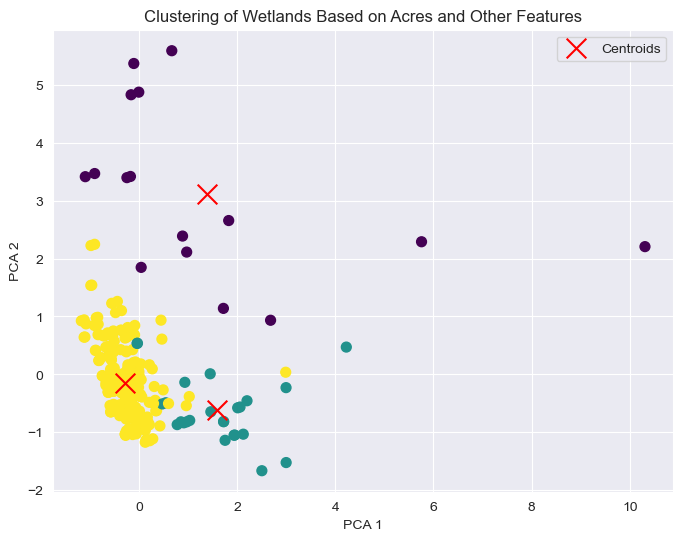

In [138]:
import matplotlib.pyplot as plt
import pandas as pd


# Assuming 'wetland_area_by_lake' has been clustered and the 'cluster' column is assigned
# Perform PCA to reduce dimensions (if needed)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)  # Add other relevant columns here

# Create the scatter plot with reduced dimensions
plt.figure(figsize=(8, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=filtered_data['cluster'], cmap='viridis', s=50)

# Plot the cluster centroids
centroids = pca.transform(kmeans.cluster_centers_)  # Assuming 'kmeans' is your KMeans model
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=200, label='Centroids')

# Enhance the plot with labels and colorbar
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clustering of Wetlands Based on Acres and Other Features')
plt.legend()

# Show the plot
plt.show()


In [174]:
from sklearn.cluster import DBSCAN

X_dbscan = wetland_area_by_lake[features]
X_imputed_dbscan = imputer.fit_transform(X_dbscan)
X_scaled_dbscan = scaler.fit_transform(X_imputed_dbscan)


dbscan = DBSCAN(eps=0.9, min_samples=5)
dbscan.fit(X_scaled_dbscan)
wetland_area_by_lake['dbscan_cluster'] = dbscan.labels_

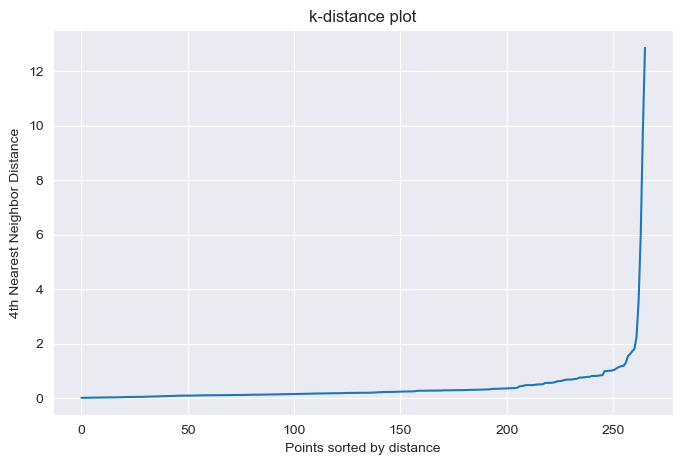

In [175]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Find nearest neighbors for k=4 (min_samples - 1)
nearest_neighbors = NearestNeighbors(n_neighbors=4)
neighbors = nearest_neighbors.fit(X_scaled_dbscan)
distances, indices = neighbors.kneighbors(X_scaled_dbscan)

# Sort and plot distances
distances = np.sort(distances[:, 3])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('k-distance plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()

In [176]:
some = wetland_area_by_lake[wetland_area_by_lake['dbscan_cluster'] != -1].copy()

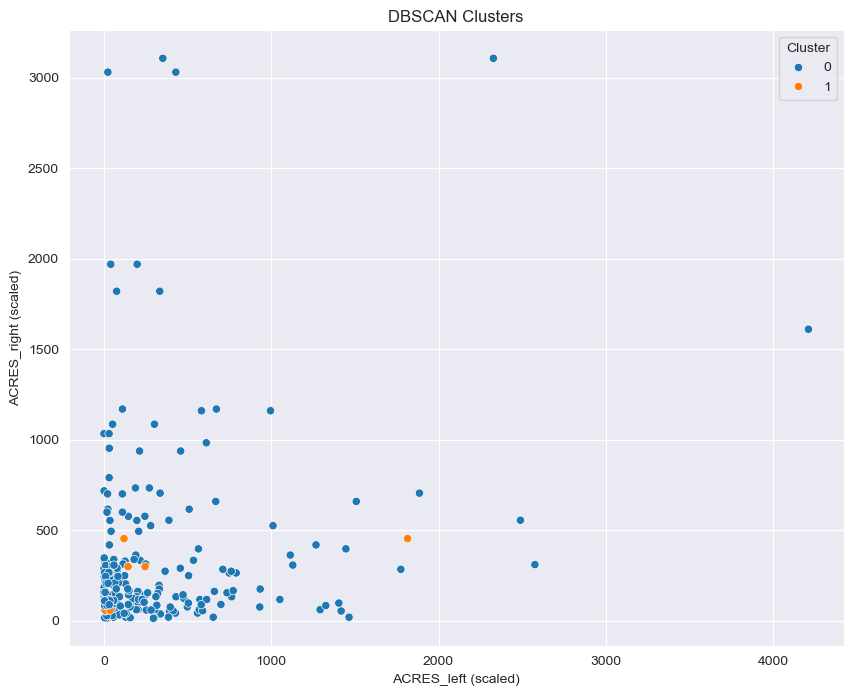

In [177]:
import seaborn as sns

# Plot clusters in 2D using the first two features
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=some['ACRES_left'], y=some['ACRES_right'],
    hue=some['dbscan_cluster']
)
plt.title('DBSCAN Clusters')
plt.xlabel('ACRES_left (scaled)')
plt.ylabel('ACRES_right (scaled)')
plt.legend(title='Cluster')
plt.show()


In [124]:
X_scaled_dbscan

array([[-0.1985388 , -0.26034525,  0.        ,  0.        ],
       [-0.1985388 , -0.24410469,  0.        ,  0.        ],
       [-0.15766034, -0.24352738,  1.60517263,  0.60353806],
       ...,
       [-0.1550233 , -0.25743036, -0.97571921,  0.12789511],
       [-0.1954534 , -0.21281958,  0.51777226, -0.68069792],
       [-0.1954534 , -0.21742302,  0.51777226, -0.68069792]])

In [140]:
wetland_coverage = wetlands_within_buffers.groupby(['NWI_ID_right', 'lake'])['ACRES_left'].sum().reset_index()

In [141]:
wetland_coverage

,NWI_ID_right,lake,ACRES_left
0,202409CSw{003D6BB8-22C1-4784-A08F-D10F81848F4B...,Russell Reservoir,75.787729
1,202409CSw{02868565-96B0-4B8C-8280-9DAEDD0A2ACC...,"Warren, Lake",388.995355
2,202409CSw{02BA58B2-906F-4766-8E70-54B562252BC5...,Rock Pond,137.783421
3,202409CSw{057D47F4-5927-4ED9-9481-166611F97FA2...,Marsh Pond,987.975000
4,202409CSw{060AFD77-2BD5-4856-B111-7FCDC340BBA1...,Pine Island Pond,16.398207
...,...,...,...
137,202409CSw{F8BE4CDD-38F9-4C58-836E-8AE7F4B89818...,White Oak Pond,1189.658573
138,202409CSw{F8FA3AD6-478F-4762-8D4E-B28360447E2E...,Nippo Pond,845.802173
139,202409CSw{FD3F2276-EDCC-42CF-B8F5-8E6441442CD2...,Lower Suncook Lake,133.077788
140,202409CSw{FE9D141B-BA81-4C15-9ADB-97E176444202...,Tower Hill Pond,39.520490


In [ ]:
# Calculate wetland areas
wetlands_within_buffers['wetland_area'] = wetlands_within_buffers.geometry.area

# Group by lakes/ponds and sum wetland areas
wetland_coverage = wetlands_within_buffers.groupby('lake_or_pond_id')['wetland_area'].sum().reset_index()

# Optionally merge this back with the lakes/ponds GeoDataFrame
lakes_ponds = lakes_ponds.merge(wetland_coverage, on='lake_or_pond_id', how='left')

# Fill NaN values for lakes/ponds with no nearby wetlands
lakes_ponds['wetland_area'] = lakes_ponds['wetland_area'].fillna(0)


In [ ]:
# Add buffer area
lakes_ponds['buffer_area'] = lakes_ponds['buffer'].area

# Calculate the proportion of wetlands to buffer area
lakes_ponds['wetland_density'] = lakes_ponds['wetland_area'] / lakes_ponds['buffer_area']


In [ ]:
# Calculate buffer area
lakes_ponds['buffer_area'] = lakes_ponds['buffer'].area

# Compute wetland density (wetland area per buffer area)
lakes_ponds['wetland_density'] = lakes_ponds['wetland_area'] / lakes_ponds['buffer_area']


In [ ]:
import matplotlib.pyplot as plt

# Plot lakes/ponds and their surrounding wetlands
ax = lakes_ponds.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(10, 10), label='Lakes/Ponds')
wetlands_within_buffers.plot(ax=ax, color='green', alpha=0.7, label='Wetlands')
plt.legend()
plt.show()


In [ ]:
wetlands['nearest_lake_distance'] = wetlands.geometry.apply(
    lambda geom: lakes_ponds.geometry.distance(geom).min()
)


### working code is above, deprecated but useful code is below

In [9]:
wetland_size_by_lake = wetlands_within_buffers.groupby('NWI_ID_right')['area'].sum()

In [10]:
wetland_coverage = wetlands_within_buffers.groupby('NWI_ID_right')['wetland_area'].sum().reset_index()

KeyError: 'Column not found: wetland_area'

In [ ]:
lakes = lakes.merge(wetland_coverage, left_on='NWI_ID', right_on='NWI_ID_right', how='left')
lakes['wetland_area'] = lakes['wetland_area'].fillna(0)

In [ ]:
wetlands_within_buffers

In [ ]:
lakes

In [ ]:
wetland_coverage

In [ ]:
# Calculate buffer area
lakes['buffer_area'] = lakes['buffer'].area

# Compute wetland density (wetland area per buffer area)
lakes['wetland_density'] = lakes['wetland_area'] / lakes['buffer_area']


In [ ]:
import matplotlib.pyplot as plt

# Plot lakes/ponds and surrounding wetlands
ax = lakes.plot(color='blue', alpha=0.5, edgecolor='k', figsize=(10, 10), label='Lakes/Ponds')
wetlands_within_buffers.plot(ax=ax, color='green', alpha=0.7, label='Wetlands')
plt.legend()
plt.title('Wetland Concentration Around Lakes and Ponds')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Add lake/pond geometry area if not already present
filtered_lakes = lakes[lakes['wetland_density'] <= 1.0]
filtered_lakes['lake_area'] = lakes.geometry.area
filtered_lakes_2 = filtered_lakes[filtered_lakes['lake_area'] <= 1000000.0]

# Plot histogram of wetland areas
plt.figure(figsize=(10, 6))
filtered_lakes_2['wetland_area'].plot.hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Wetland Areas Around Lakes and Ponds')
plt.xlabel('Wetland Area (square meters)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


In [ ]:


# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(filtered_lakes_2['lake_area'], filtered_lakes_2['wetland_density'], alpha=0.6, color='green')
plt.title('Wetland Density vs. Lake/Pond Area')
plt.xlabel('Lake/Pond Area (square meters)')
plt.ylabel('Wetland Density')
plt.grid()
plt.show()


In [ ]:
# Group by lake type and calculate total wetland area
wetland_by_type = lakes.groupby('WETLAND_TYPE')['wetland_area'].sum().sort_values()

# Bar plot
plt.figure(figsize=(10, 6))
wetland_by_type.plot(kind='bar', color='cornflowerblue')
plt.title('Total Wetland Area by Lake Type')
plt.xlabel('Lake Type')
plt.ylabel('Total Wetland Area (square meters)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
# Plot lakes/ponds with color representing wetland density
ax = filtered_lakes_2.plot(column='wetland_density', cmap='viridis', legend=True, figsize=(10, 10))
plt.title('Wetland Density Around Lakes and Ponds')
plt.show()


In [ ]:
filtered_lakes['lake_area'].max()

In [ ]:
summary = filtered_lakes_2[['wetland_area', 'wetland_density', 'lake_area']].describe()

In [ ]:
summary

In [0]:
clipped_wetlands = gpd.overlay(wetlands, lakes_buffers, how='intersection')

In [0]:
wetlands_within_buffers['geometry'].area.describe()

In [0]:
clipped_wetlands['geometry'].area.describe()

In [0]:
import pandas as pd

# Wetland area within buffer (intersects)
wetlands_within_buffers['area'] = wetlands_within_buffers.geometry.area
intersects_area = wetlands_within_buffers.groupby('NWI_ID_right')['area'].sum()

# Wetland area within buffer (intersection)
clipped_wetlands['area'] = clipped_wetlands.geometry.area
intersection_area = clipped_wetlands.groupby('NWI_ID_2')['area'].sum()

# Compare the results
comparison = pd.DataFrame({
    'Intersects Area': intersects_area,
    'Intersection Area': intersection_area
}).fillna(0)

# Check the ratio of areas
comparison['Area Ratio'] = comparison['Intersection Area'] / comparison['Intersects Area']
print(comparison)


In [0]:
comparison